In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

os.chdir('drive/MyDrive/PR202010770/Lab09')

In [3]:
import utils

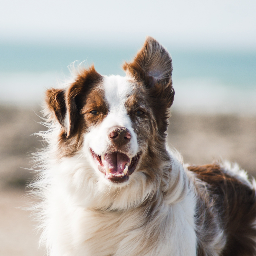

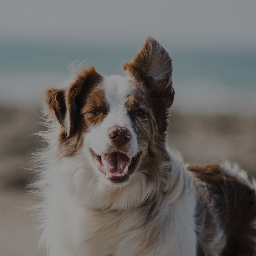

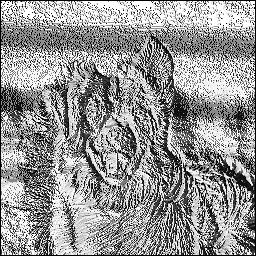

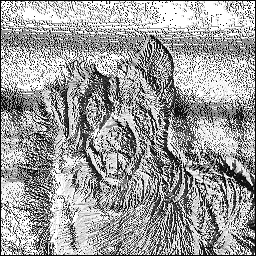

In [13]:

path1 = 'images/dog_0.jpg'
path2 = 'images/dog_1.jpg'

img_bgr1 = cv2.imread(path1)
img_bgr2 = cv2.imread(path2)

img_bgr1 = cv2.resize(img_bgr1, (256, 256))
img_bgr2 = cv2.resize(img_bgr2, (256, 256))

height, width, _ = img_bgr1.shape

img_gray1 = cv2.cvtColor(img_bgr1, cv2.COLOR_BGR2GRAY)
img_gray2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2GRAY)

img_lbp_raw = np.zeros((height, width), np.uint8)
img_lbp_dark = np.zeros((height, width), np.uint8)

for i in range(1, height-1):
    for j in range(1, width-1):
        img_lbp_raw[i, j] = utils.lbp_algorithm(img_gray1, i, j, False)
        img_lbp_dark[i, j] = utils.lbp_algorithm(img_gray2, i, j, False)

cv2_imshow(img_bgr1)
cv2_imshow(img_bgr2)
cv2_imshow(img_lbp_raw)
cv2_imshow(img_lbp_dark)

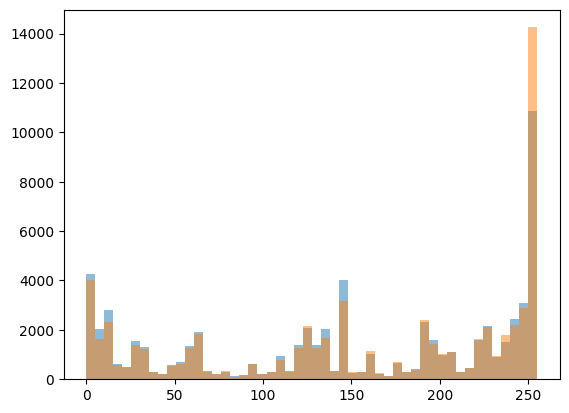

In [14]:
plt.hist(img_lbp_raw.flatten(), bins=50, alpha=.5);
plt.hist(img_lbp_dark.flatten(), bins=50, alpha=.5);

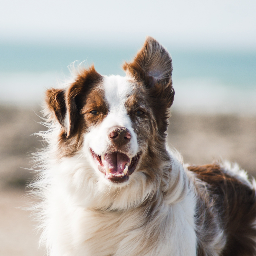

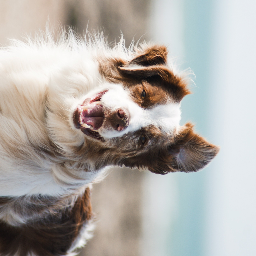

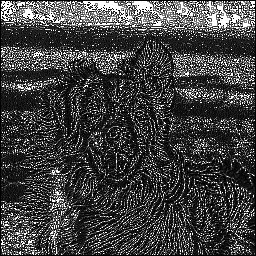

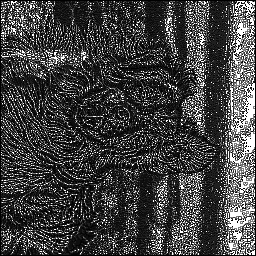

In [16]:

path1 = 'images/dog_0.jpg'
path2 = 'images/dog_2.jpg'
img_bgr1 = cv2.imread(path1)
img_bgr2 = cv2.imread(path2)

img_bgr1 = cv2.resize(img_bgr1, (256, 256))
img_bgr2 = cv2.resize(img_bgr2, (256, 256))

height, width, _ = img_bgr1.shape

img_gray1 = cv2.cvtColor(img_bgr1, cv2.COLOR_BGR2GRAY)
img_gray2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2GRAY)

img_lbp_raw = np.zeros((height, width), np.uint8)
img_lbp_rotate = np.zeros((height, width), np.uint8)

for i in range(1, height-1):
    for j in range(1, width-1):
        img_lbp_raw[i, j] = utils.lbp_algorithm(img_gray1, i, j, True)
        img_lbp_rotate[i, j] = utils.lbp_algorithm(img_gray2, i, j, True)

cv2_imshow(img_bgr1)
cv2_imshow(img_bgr2)
cv2_imshow(img_lbp_raw)
cv2_imshow(img_lbp_rotate)

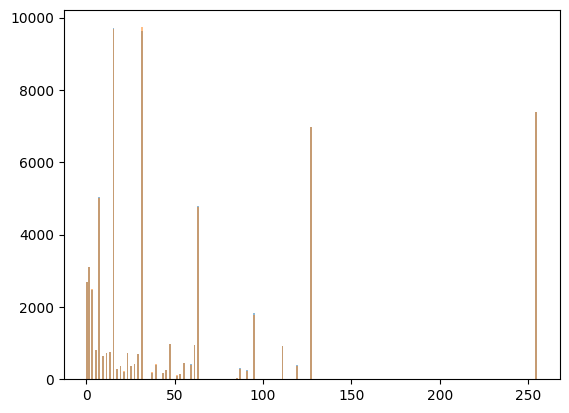

In [17]:
plt.hist(img_lbp_raw.flatten(), bins=256, alpha=.5);
plt.hist(img_lbp_rotate.flatten(), bins=256, alpha=.5);

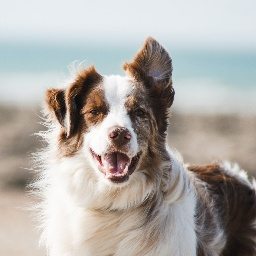

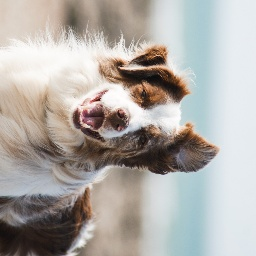

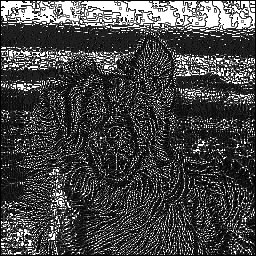

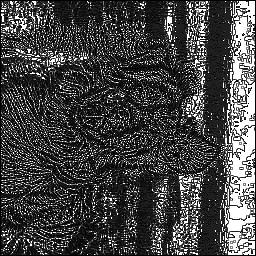

LBP Program is finished


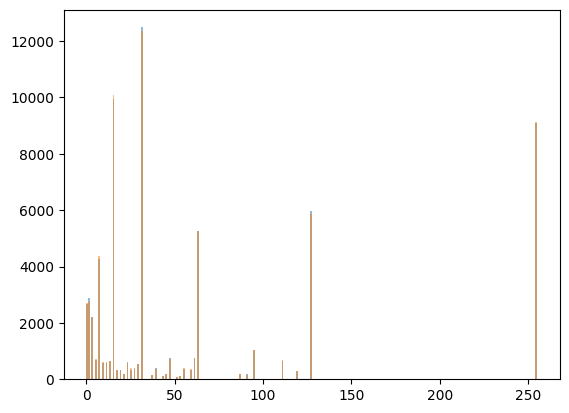

In [ ]:
## dog_0, dog_2 rotation invariant 결과 출력하기

# 비슷한 질감 찾기

In [18]:
inputpath = 'images/train/'
filelist = os.listdir(inputpath)

pattern_dict = []

for filename in filelist:
  img = cv2.imread(inputpath+filename)
  img_hist = utils.img2histo(img)
  pattern_dict.append([filename, img_hist])

In [22]:
inputpath = 'images/test/03_0.png'
test = cv2.imread(inputpath)
test_histo = utils.img2histo(test)

for onehist in pattern_dict:
  rmse = np.sqrt(np.mean((test_histo - onehist[1]) ** 2))
  print(onehist[0], rmse)

lbp01_1.png 120.8044
lbp01_2.png 132.72304
lbp01_3.png 124.436195
lbp01_4.png 136.50014
lbp02_1.png 138.7134
lbp02_2.png 116.62898
lbp02_3.png 131.74342
lbp02_4.png 130.09497
lbp03_1.png 38.421696
lbp03_2.png 29.75197
lbp03_3.png 34.083195
lbp03_4.png 31.936705


# Face Recognition

In [27]:
inputpath = 'images/face_recognition/'
outputpath = 'images/face_recognition_cropped/'
os.makedirs(outputpath, exist_ok=True)

filelist = os.listdir(inputpath)

images/face_recognition/faker1.jpg


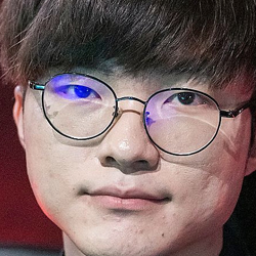

images/face_recognition/faker2.jpg


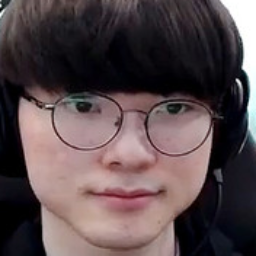

images/face_recognition/george1.jpg


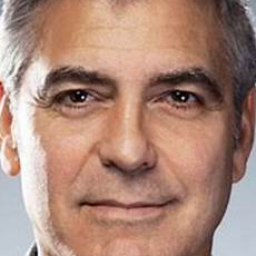

images/face_recognition/george2.jpg


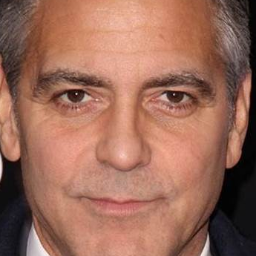

images/face_recognition/karina1.jpg


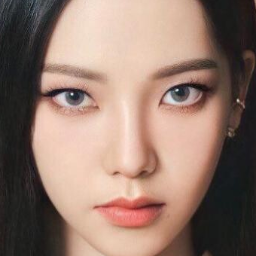

images/face_recognition/karina2.jpg


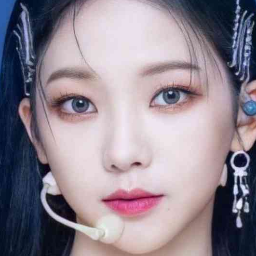

images/face_recognition/matt1.jpg


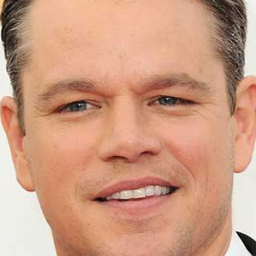

images/face_recognition/matt2.jpg


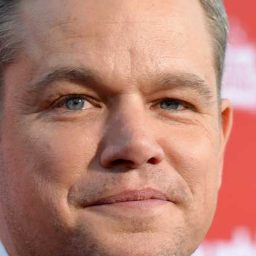

images/face_recognition/nicolas1.jpg


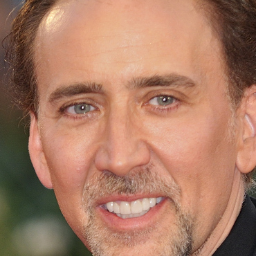

images/face_recognition/nicolas2.jpg


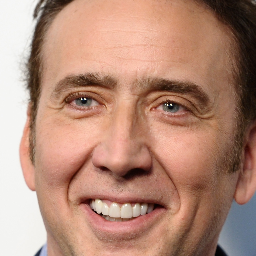

images/face_recognition/tom1.jpg


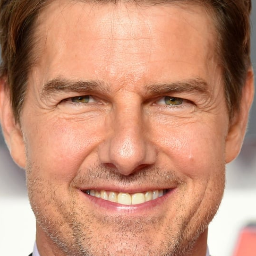

images/face_recognition/tom2.jpg


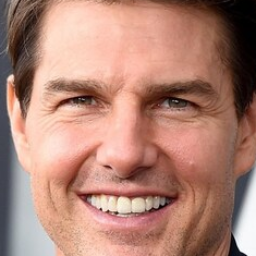

In [28]:
for filename in filelist:
  print(inputpath+filename)
  img = cv2.imread(inputpath+filename)

  # Convert into grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Load the cascade
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

  # Detect faces
  faces = face_cascade.detectMultiScale(gray, 1.1, 4)

  # crop the faces (first detection only)
  for (x, y, w, h) in [faces[0]]:
      faces = img[y:y + h, x:x + w]
      # resize (optional)
      faces = cv2.resize(faces, (256,256))
      cv2_imshow(faces)
      cv2.imwrite(outputpath+filename, faces)


In [57]:
## Patch로 나누지 않을 경우

inputpath = 'images/face_recognition_cropped/tom1.jpg'
tom1 = cv2.imread(inputpath)
inputpath = 'images/face_recognition_cropped/faker1.jpg'
faker1 = cv2.imread(inputpath)
inputpath = 'images/face_recognition_cropped/matt1.jpg'
matt1 = cv2.imread(inputpath)
inputpath = 'images/face_recognition_cropped/karina1.jpg'
karina1 = cv2.imread(inputpath)

tom_histo_whole = utils.img2histo(tom1)
faker_histo_whole = utils.img2histo(faker1)
matt_histo_whole = utils.img2histo(matt1)
karina_histo_whole = utils.img2histo(karina1)

In [58]:
inputpath = 'images/face_recognition_cropped/faker2.jpg'
test = cv2.imread(inputpath)

test_histo_whole = utils.img2histo(test)

## 각 인물과 test histogram의 RMSE 확인해보기
print('tom', np.sqrt(np.mean((tom_histo_whole - test_histo_whole) ** 2)))
print('faker', np.sqrt(np.mean((faker_histo_whole - test_histo_whole) ** 2)))
print('matt', np.sqrt(np.mean((matt_histo_whole - test_histo_whole) ** 2)))
print('karina', np.sqrt(np.mean((karina_histo_whole - test_histo_whole) ** 2)))

tom 323.3525
faker 386.11243
matt 207.37056
karina 225.04053


In [52]:
## Patch로 나눌 경우

tom_histo_patch = utils.img2histo_patch(tom1, 8)
faker_histo_patch = utils.img2histo_patch(faker1, 8)
matt_histo_patch = utils.img2histo_patch(matt1, 8)
karina_histo_patch = utils.img2histo_patch(karina1, 8)

In [54]:
inputpath = 'images/face_recognition_cropped/karina2.jpg'
test = cv2.imread(inputpath)

test_histo_patch = utils.img2histo_patch(test, 8)

## 각 인물과 test histogram의 RMSE 확인해보기
print('tom', np.sqrt(np.mean((tom_histo_patch - test_histo_patch) ** 2)))
print('faker', np.sqrt(np.mean((faker_histo_patch - test_histo_patch) ** 2)))
print('matt', np.sqrt(np.mean((matt_histo_patch - test_histo_patch) ** 2)))
print('karina', np.sqrt(np.mean((karina_histo_patch - test_histo_patch) ** 2)))

[151.   9.  11. ...  28.   6.  84.]
tom 13.059967233520343
faker 10.71842542329271
matt 13.04981722064288
karina 10.295351509070125
